In [1]:
####---- importing packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,accuracy_score

In [54]:
####---- Loading the dataset
df=pd.read_csv('C:/Data Science/24 july/10. Random Forests/Fraud_check.csv')

In [3]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
####---- data preprocessing

In [5]:
def preprocessing(df):
    columns=df.shape[1]
    print('Total number of columns are : ',columns)
    rows=df.shape[0]
    print('Total no of rows are : ',rows)
    missing=df.isnull().sum()
    print('Total no of missing values are :\n',missing)
    data_types=df.dtypes
    print('Total datatypes in dataset are :\n',data_types)
    return df
    

In [6]:
preprocessing(df)

Total number of columns are :  6
Total no of rows are :  600
Total no of missing values are :
 Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64
Total datatypes in dataset are :
 Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object


,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [ ]:
####---- Exploratory Data Analysis (EDA)

In [7]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Undergrad,600,2,YES,312,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital.Status,600,3,Single,217,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Taxable.Income,600.0,NaN,NaN,NaN,55208.375,26204.827597,10003.0,32871.5,55074.5,78611.75,99619.0
City.Population,600.0,NaN,NaN,NaN,108747.368333,49850.075134,25779.0,66966.75,106493.5,150114.25,199778.0
Work.Experience,600.0,NaN,NaN,NaN,15.558333,8.842147,0.0,8.0,15.0,24.0,30.0
Urban,600,2,YES,302,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df['Taxable.Income'].skew(),df['City.Population'].skew(),df['Work.Experience'].skew()

(0.030014788906377175, 0.12500898782679504, 0.01852862786533781)

In [9]:
df['Taxable.Income'].median(),df['City.Population'].median(),df['Work.Experience'].median()

(55074.5, 106493.5, 15.0)

In [ ]:
####---- Graphical Representation

In [ ]:
####---- finding outliers in dataset,

<AxesSubplot:>

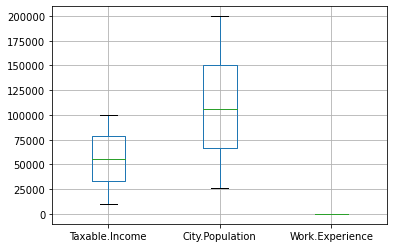

In [10]:
df.boxplot()

In [11]:
df1=df[df['Taxable.Income']<30000]
df1

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
10,NO,Single,29732,102602,19,YES
12,NO,Divorced,11794,148033,14,YES
16,YES,Divorced,24987,34551,29,NO
19,NO,Single,10987,126953,30,YES
21,YES,Divorced,14310,29106,7,YES
...,...,...,...,...,...,...
544,NO,Single,29916,133877,21,YES
557,YES,Married,12810,157421,10,NO
567,YES,Single,16316,129912,30,NO
575,NO,Divorced,10735,95975,13,YES


In [12]:
df2=df[df['Taxable.Income']>30000]
df2

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Taxable.Income', ylabel='Density'>

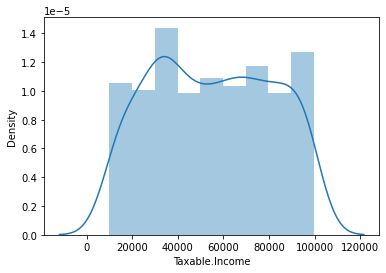

In [13]:
sns.distplot(df['Taxable.Income'])

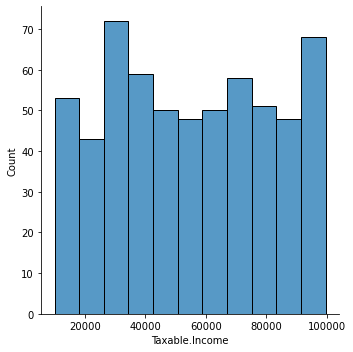

In [14]:
sns.displot(data=df,x='Taxable.Income')

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='City.Population', ylabel='Density'>

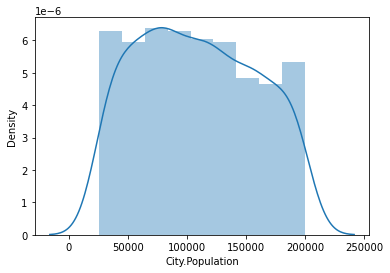

In [15]:
sns.distplot(df['City.Population'])

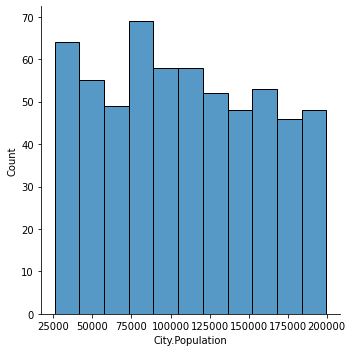

In [16]:
sns.displot(data=df,x='City.Population')

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Work.Experience', ylabel='Density'>

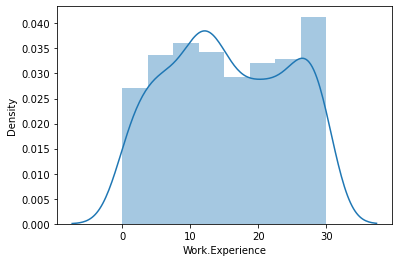

In [17]:
sns.distplot(df['Work.Experience'])

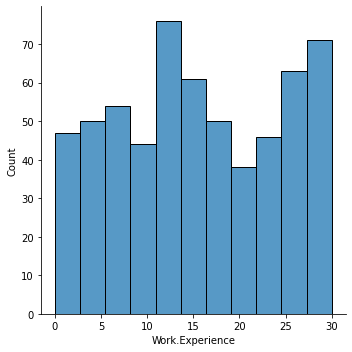

In [18]:
sns.displot(data=df,x='Work.Experience')

In [19]:
a=df.groupby(['Marital.Status']).count()
a

,Undergrad,Taxable.Income,City.Population,Work.Experience,Urban
Marital.Status,,,,,
Divorced,189,189,189,189,189
Married,194,194,194,194,194
Single,217,217,217,217,217


<AxesSubplot:xlabel='Marital.Status', ylabel='Urban'>

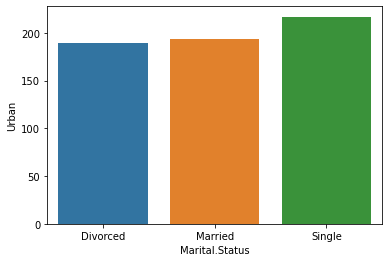

In [20]:
sns.barplot(data=a,x=a.index,y='Urban')

In [21]:
b=df.groupby(['Urban']).count()
b

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience
Urban,,,,,
NO,298,298,298,298,298
YES,302,302,302,302,302


<AxesSubplot:xlabel='Urban', ylabel='Work.Experience'>

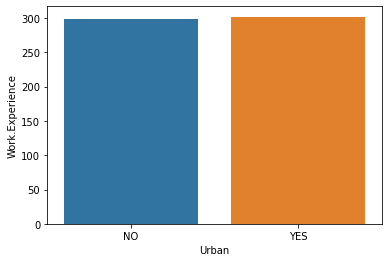

In [22]:
sns.barplot(data=b,x=b.index,y='Work.Experience',)

In [23]:
c=df.groupby(['Undergrad']).count()
c

,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
Undergrad,,,,,
NO,288,288,288,288,288
YES,312,312,312,312,312


<AxesSubplot:xlabel='Undergrad', ylabel='Work.Experience'>

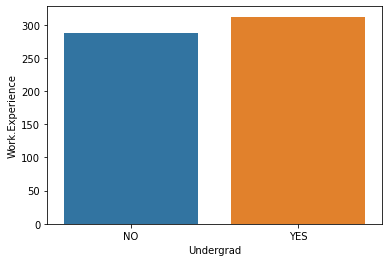

In [24]:
sns.barplot(data=c,x=c.index,y='Work.Experience')

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
label=LabelEncoder()

In [27]:
df['Undergrad']=label.fit_transform(df['Undergrad'])

In [28]:
df['Marital.Status']=label.fit_transform(df['Marital.Status'])

In [29]:
df['Urban']=label.fit_transform(df['Urban'])

In [30]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [31]:
bins=[0,30000,float('inf')]
df['Income_bin']=pd.cut(df['Taxable.Income'],bins=bins,labels=['below 30000','above 30000'])

In [32]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Income_bin
0,0,2,68833,50047,10,1,above 30000
1,1,0,33700,134075,18,1,above 30000
2,0,1,36925,160205,30,1,above 30000
3,1,2,50190,193264,15,1,above 30000
4,0,1,81002,27533,28,0,above 30000
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,above 30000
596,1,0,69967,55369,2,1,above 30000
597,0,0,47334,154058,0,1,above 30000
598,1,1,98592,180083,17,0,above 30000


In [33]:
d={'above 30000':1,'below 30000':0}
df['Income_bin']=df['Income_bin'].map(d)

In [34]:
df['Income_bin'].unique()

[1, 0]
Categories (2, int64): [0 < 1]

In [35]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Income_bin
0,0,2,68833,50047,10,1,1
1,1,0,33700,134075,18,1,1
2,0,1,36925,160205,30,1,1
3,1,2,50190,193264,15,1,1
4,0,1,81002,27533,28,0,1
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,1
596,1,0,69967,55369,2,1,1
597,0,0,47334,154058,0,1,1
598,1,1,98592,180083,17,0,1


In [36]:
X=df.iloc[:,0:6]
X

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [37]:
y=df.iloc[:,-1]
y

0      1
1      1
2      1
3      1
4      1
      ..
595    1
596    1
597    1
598    1
599    1
Name: Income_bin, Length: 600, dtype: category
Categories (2, int64): [0 < 1]

In [38]:
####---- Feature Engineering

In [39]:
##### since dataset have skew is near to zero, and median and mean are almost same we use Standard scalar

In [40]:
scalar=StandardScaler()

In [41]:
X_train=scalar.fit_transform(X)
X_train

array([[-1.040833  ,  1.16079994,  0.52036187, -1.17852072, -0.62914254,
         0.99335541],
       [ 0.96076892, -1.27444469, -0.82146395,  0.50850002,  0.27636996,
         0.99335541],
       [-1.040833  , -0.05682237, -0.69829233,  1.03310911,  1.63463872,
         0.99335541],
       ...,
       [-1.040833  , -1.27444469, -0.30074402,  0.90969648, -1.76103318,
         0.99335541],
       [ 0.96076892, -0.05682237,  1.65693986,  1.43219749,  0.1631809 ,
        -1.00668904],
       [-1.040833  , -1.27444469,  1.57776629,  0.9915901 ,  0.04999184,
        -1.00668904]])

In [42]:
def random_forest(x,y):
    model=RandomForestClassifier(criterion='gini')
    model_train=model.fit(x,y)
    pred=model_train.predict(x)
    return pred

In [43]:
pred=random_forest(X_train,y)

In [44]:
cf=confusion_matrix(y,pred)
cf

array([[124,   0],
       [  0, 476]], dtype=int64)

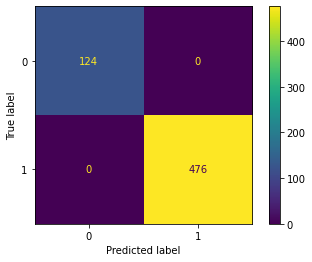

In [45]:
a=ConfusionMatrixDisplay(cf,)
a.plot()

In [53]:
accuracy_score(y,pred)

1.0

In [55]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [56]:
df['Work.Experience'].describe()

count    600.000000
mean      15.558333
std        8.842147
min        0.000000
25%        8.000000
50%       15.000000
75%       24.000000
max       30.000000
Name: Work.Experience, dtype: float64

In [60]:
bins1=[0,6,12,18,24,30,]
df['work_bin']=pd.cut(df['Work.Experience'],bins=bins1,labels=['0-6','7-12','13-18','19-24','above 25'],)

In [61]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,work_bin
0,NO,Single,68833,50047,10,YES,7-12
1,YES,Divorced,33700,134075,18,YES,13-18
2,NO,Married,36925,160205,30,YES,above 25
3,YES,Single,50190,193264,15,YES,13-18
4,NO,Married,81002,27533,28,NO,above 25
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,7-12
596,YES,Divorced,69967,55369,2,YES,0-6
597,NO,Divorced,47334,154058,0,YES,NaN
598,YES,Married,98592,180083,17,NO,13-18


In [63]:
df.groupby(['work_bin']).size()

work_bin
0-6         102
7-12        127
13-18       118
19-24       105
above 25    134
dtype: int64